In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()  # for plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv('driver-data.csv')
print (data.shape)
print (data.head)

(4000, 3)
<bound method NDFrame.head of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>


In [21]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [99]:
newdata = data.loc[:,['mean_dist_day','mean_over_speed_perc']]
newdata.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [64]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(newdata)

KMeans(n_clusters=2)

In [68]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [70]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


In [101]:
# plot the data 
newdata['cluster'] = kmeans.labels_
newdata.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


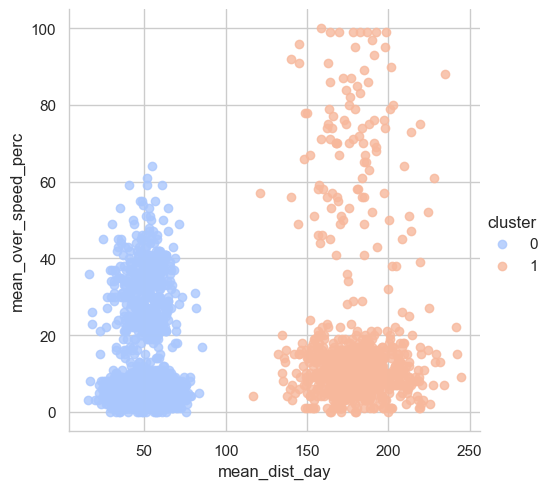

In [92]:
sns.set_style('whitegrid')
sns.lmplot(data=newdata,x='mean_dist_day',y='mean_over_speed_perc',hue='cluster',
           palette='coolwarm',aspect=1,fit_reg=False)

In [103]:
newdata.sort_values(by='mean_dist_day', ascending=False).head()

,mean_dist_day,mean_over_speed_perc,cluster
3603,244.79,9,1
3613,242.37,15,1
3655,241.71,22,1
3228,234.52,88,1
3611,234.09,7,1


In [105]:
newdata.sort_values(by='mean_over_speed_perc', ascending=False).head()

,mean_dist_day,mean_over_speed_perc,cluster
3306,158.47,100,1
3312,182.53,99,1
3270,192.37,99,1
3245,164.13,99,1
3273,178.47,99,1


In [107]:
newdata.sort_values(by='mean_dist_day', ascending=True).head()

,mean_dist_day,mean_over_speed_perc,cluster
1099,15.52,3,0
291,16.05,36,0
2873,16.39,8,0
50,17.66,23,0
86,17.81,26,0


In [109]:
newdata.sort_values(by='mean_over_speed_perc', ascending=True).head()

,mean_dist_day,mean_over_speed_perc,cluster
3361,179.97,0,1
1866,28.70,0,0
1439,45.58,0,0
2001,48.91,0,0
2011,40.05,0,0
